### Import some stuff we need. Predefine a function to get the largest connected component.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing, binary_fill_holes
from PIL import Image
from skimage import measure
    
def getLargestCC(segmentation):
    labels = measure.label(segmentation)
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC
    

### Read and show elk image

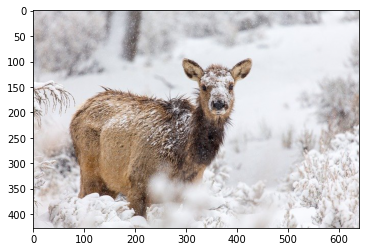

In [19]:
thresh = 0.6
img_dir="elk.jpg"
img_pil=Image.open(img_dir)
testimg=np.array(img_pil)/255.0
plt.imshow(testimg)
plt.imshow(testimg)
plt.show()

In [ ]:
### Now it is your turn! Use morphological operations such as binary closing, 

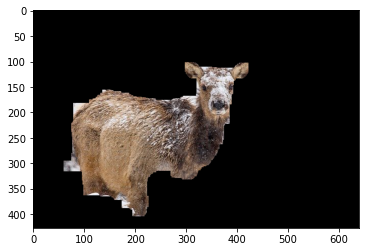

In [82]:
segmentationMap = testimg.mean(axis=2)<0.4 ## This seems to be a reasonable initial threshold! 
#
# Your code
# goes here
se1 = np.ones((28,28), dtype=bool)
segmentationMap = binary_closing(segmentationMap,se1)
se2 = np.ones((18,18), dtype=bool)
segmentationMap = binary_opening(segmentationMap,se2)
#
segmentationMap = getLargestCC(segmentationMap)
plt.imshow(testimg*segmentationMap[:,:,np.newaxis])
plt.show()


img_dir="forest.jpg"
img_pil=Image.open(img_dir)
beachImg=np.array(img_pil)/255.0

# plt.figure(figsize=(10,15))
# plt.imshow(beachImg)
# plt.show()


# manipulatedImg = beachImg.copy()

# ny,nx,nc = testimg.shape
# manipulatedImg[-ny-1:-1, 40:40+nx,:] = testimg*segmentationMap[:,:,np.newaxis] + (1-segmentationMap[:,:,np.newaxis])*beachImg[-ny-1:-1, 40:40+nx,:]



# plt.figure(figsize=(10,15))
# plt.imshow(manipulatedImg)
# plt.show()



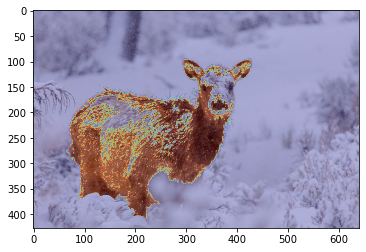

In [36]:
plt.imshow(testimg)
plt.imshow(segmentationMap, cmap='jet', alpha=0.3)
plt.show()